In [1]:
## Support Vector Machine Classification applied to EEG data
##
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Class 1 : seizure data
eeg_01 = pd.read_csv('eeg_class1.csv')

In [3]:
# Class 2 : non-seizure data but probe at epileptic zone
eeg_02 = pd.read_csv('eeg_class2.csv')

In [4]:
# Concatanating the two data sets into one with only two classes : 1 and 2 as y values
eeg_012 = pd.concat([eeg_01, eeg_02])

In [5]:
eeg_012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4600 entries, 0 to 2299
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 6.3 MB


In [6]:
Y = list(eeg_012.pop('y'))

In [7]:
X = eeg_012.values

In [9]:
# Cross Validation
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [10]:
# Cross Validation train test split of PC 
test_size = 0.30
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=0)

In [11]:
len(X_test)

1380

In [12]:
# Instantiating multilayer perceptron learning (MLP)
from sklearn.neural_network import MLPClassifier

In [13]:
# solving for 5 hidden layer with 2 biases
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [15]:
# MLP training
clf.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [16]:
# MLP Predicting
pred_mlp = clf.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred_mlp)
print(cm)

[[579 129]
 [ 42 630]]


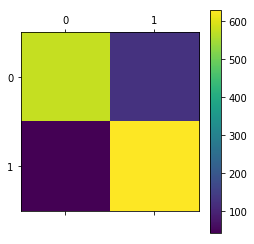

In [32]:
plt.matshow(cm)
plt.colorbar()
plt.show()

In [33]:
print(metrics.accuracy_score(Y_test, pred_mlp))
accuracy = accuracy_score(Y_test, pred_mlp)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.876086956522
Accuracy: 87.61%


In [20]:
# working with Class 1 = 1 vs all other classes = 0
eeg_mlp = pd.read_csv('eeg_class.csv')

In [22]:
yy = list(eeg_mlp.pop('y'))

In [23]:
xx = eeg_mlp.values

In [24]:
# Cross Validation train test split of PC 
test_size = 0.30
xx_train, xx_test, yy_train, yy_test = cross_validation.train_test_split(xx, yy, test_size=test_size, random_state=0)

In [25]:
clf.fit(xx_train, yy_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [26]:
predict = clf.predict(xx_test)

In [28]:
cm_mlp = confusion_matrix(yy_test, predict)
print(cm_mlp)

[[2725   34]
 [ 222  469]]


In [29]:
print(metrics.accuracy_score(yy_test, predict))
accuracy = accuracy_score(yy_test, predict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.925797101449
Accuracy: 92.58%


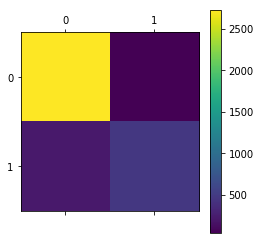

In [30]:
plt.matshow(cm_mlp)
plt.colorbar()
plt.show()

In [34]:
precision = metrics.precision_score(yy_test, predict)
print("Precision Score: %.2f%%" % (precision * 100))

Precision Score: 93.24%


In [35]:
# Applying the multiclass MLP learning 
eeg = pd.read_csv("eeg_data_1.csv")

In [36]:
eeg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.7 MB


In [37]:
eeg.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [38]:
y_mc = list(eeg.pop('y'))

In [39]:
x_mc = eeg.values

In [40]:
y_mc = np.asarray(y_mc)

In [43]:
# Feature Scaling the data for MLP Classification
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_mc = sc.fit_transform(x_mc)

In [44]:
# splitting into corss validation train and test sets
test_size = 0.30
x_mc_train, x_mc_test, y_mc_train, y_mc_test = cross_validation.train_test_split(x_mc, y_mc, test_size=test_size, random_state=0)

In [45]:
clf.fit(x_mc_train, y_mc_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [46]:
pred_mc = clf.predict(x_mc_test)

In [47]:
cm_mc = confusion_matrix(y_mc_test, pred_mc)
print(cm_mc)

[[520   1   3 138  29]
 [  7  16 449  53 159]
 [  1  16 479  47 114]
 [ 77   9  33 367 199]
 [  1  26 210 160 336]]


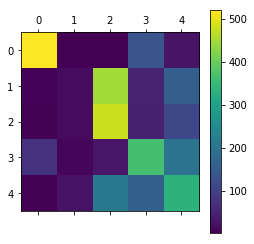

In [48]:
plt.matshow(cm_mc)
plt.colorbar()
plt.show()

In [50]:
print(metrics.accuracy_score(y_mc_test, pred_mc))
accuracy = accuracy_score(y_mc_test, pred_mc)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.497971014493
Accuracy: 49.80%


In [52]:
# Redoing the calculation without feature scaling
eeg_1 = pd.read_csv('eeg_data_1.csv')

In [53]:
YY = np.asarray(eeg_1.pop('y'))

In [54]:
YY

array([4, 1, 5, ..., 5, 3, 4], dtype=int64)

In [55]:
XX = eeg_1.values

In [56]:
XX

array([[ 135,  190,  229, ..., -116,  -83,  -51],
       [ 386,  382,  356, ...,  154,  143,  129],
       [ -32,  -39,  -47, ...,  -35,  -35,  -36],
       ..., 
       [  14,    6,  -13, ...,   -2,   -1,   -8],
       [ -40,  -25,   -9, ...,   68,   59,   55],
       [  29,   41,   57, ...,   -2,    2,   20]], dtype=int64)

In [57]:
# splitting into corss validation train and test sets
test_size = 0.30
XX_train, XX_test, YY_train, YY_test = cross_validation.train_test_split(XX, YY, test_size=test_size, random_state=0)

In [58]:
clf.fit(XX_train, YY_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [59]:
prediction = clf.predict(XX_test)

In [60]:
confusion = confusion_matrix(YY_test, prediction)
print(confusion)

[[549  45  16  78   3]
 [ 27  79 208 100 270]
 [  2  76 217  78 284]
 [ 35  66 119 290 175]
 [  0  45 200 109 379]]


In [61]:
print(metrics.accuracy_score(YY_test, prediction))
accuracy = accuracy_score(YY_test, prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.43884057971
Accuracy: 43.88%


In [ ]:
# The prediction accuracy reduces without feature scaling for multiclass classification

In [160]:
# Classification using a deep net with 200 hidden layers on the feature scaled data
clf_deep = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(200, 100), random_state=1)

In [161]:
clf_deep.fit(x_mc_train, y_mc_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [115]:
len(x_mc_test)

3450

In [162]:
pred_deep = clf_deep.predict(x_mc_test)

In [163]:
cm_deep = confusion_matrix(y_mc_test, pred_deep)
print(cm_deep)

[[624  39  11  17   0]
 [ 27 380 216   8  53]
 [ 18 175 404  15  45]
 [ 14  12  11 534 114]
 [  0  60  63 126 484]]


In [164]:
print(metrics.accuracy_score(y_mc_test, pred_deep))
accuracy = accuracy_score(y_mc_test, pred_deep)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.703188405797
Accuracy: 70.32%


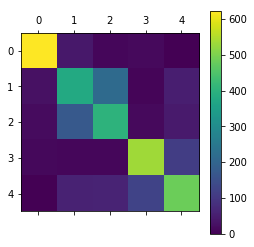

In [165]:
plt.matshow(cm_deep)
plt.colorbar()
plt.show()

In [182]:
# True Positives for the Multiclass Classification
TP = cm_deep[0,0]+cm_deep[1,1]+cm_deep[2,2]+cm_deep[3,3]+cm_deep[4,4]
FP = cm_deep[0,1]+cm_deep[0,2]+cm_deep[0,3]+cm_deep[0,4]
FN = cm_deep[1,0]+cm_deep[2,0]+cm_deep[3,0]+cm_deep[4,0]
print("True Positive = ", TP, ", False Positive = ", FP, "False Negative = ", FN, "cases in epileptic seizure prediction")

True Positive =  2426 , False Positive =  67 False Negative =  59 cases in epileptic seizure prediction


In [181]:
print("sensitivity = ", TP/(TP+FN)*100, "and selectivity = ", TP/(TP+FP)*100,"%" )

sensitivity =  97.6257545272 and selectivity =  97.3124749298 %


In [ ]:
# comments
# Performance better than multiclass decision tree 
# Computation time much less than Random Forest Classifier